In [11]:
import scanpy as sc 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import bbknn
import copy
import matplotlib.pyplot as plt
sc.settings.verbosity = 0 # 设置全局的waring数量，我这里直接不要求显示
sc.settings.set_figure_params(dpi_save=400, facecolor='white', fontsize=7, format='jpg',dpi=400)

In [12]:
adata = sc.read_h5ad('../data/manual_plot4.h5ad')

In [13]:
celltype = list(np.unique(adata.obs['leiden_poly']))

mem = {'AF-1':{},'AF-2':{},'AF-3':{}}
for k in mem.keys():
    for ct in celltype:
        mem[k][ct] = 0.0
        
for ct in celltype:
    for k in mem.keys():
        tmp_total = adata[adata.obs['sample'].isin([k])].shape[0]
        tmp_n =  adata[adata.obs['sample'].isin([k])&adata.obs['leiden_poly'].isin([ct])].shape[0]
        mem[k][ct] = round(tmp_n/tmp_total * 100, 5)

In [14]:
c0 = np.array([181, 170, 210, 255]) / 255   # 紫
c1 = np.array([70,169,224,255]) / 255   # 蓝
c2 = np.array([163, 218, 202, 255]) / 255   # 绿
c3 = np.array([239,92,85,255]) / 255   # 红
c4 = np.array([255, 180, 160, 255]) / 255   # 橙
c5 = '#c4e693' # 黄

In [15]:
df = pd.DataFrame(columns=['Fibroblasts','Fibroblast-like Synoviocytes', 'Macrophages-M2', 'Endothelial', 'VSMC', 'T cells',
       ])

In [16]:
for i,k in enumerate(mem.keys()):
    tmp_df = pd.DataFrame(mem[k].values(),index=mem[k].keys(), columns=[k]).T
    df = pd.concat([df,tmp_df])

In [17]:
df

,Fibroblasts,Fibroblast-like Synoviocytes,Macrophages-M2,Endothelial,VSMC,T cells
AF-1,54.59666,15.09401,19.80764,3.76917,3.3446,3.38792
AF-2,48.20002,7.19992,23.15067,14.47504,4.5587,2.41564
AF-3,48.13911,11.26703,25.62538,9.47732,2.3795,3.11165


In [18]:
for i in range(1,df.shape[1]):
    df.iloc[:,i] += df.iloc[:,i-1]
df = round(df,1)

In [19]:
df 

,Fibroblasts,Fibroblast-like Synoviocytes,Macrophages-M2,Endothelial,VSMC,T cells
AF-1,54.6,69.7,89.5,93.3,96.6,100.0
AF-2,48.2,55.4,78.6,93.0,97.6,100.0
AF-3,48.1,59.4,85.0,94.5,96.9,100.0


/var/folders/0q/0x0df50j27b1w78yn0n106jc0000gp/T/ipykernel_25861/2377406168.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


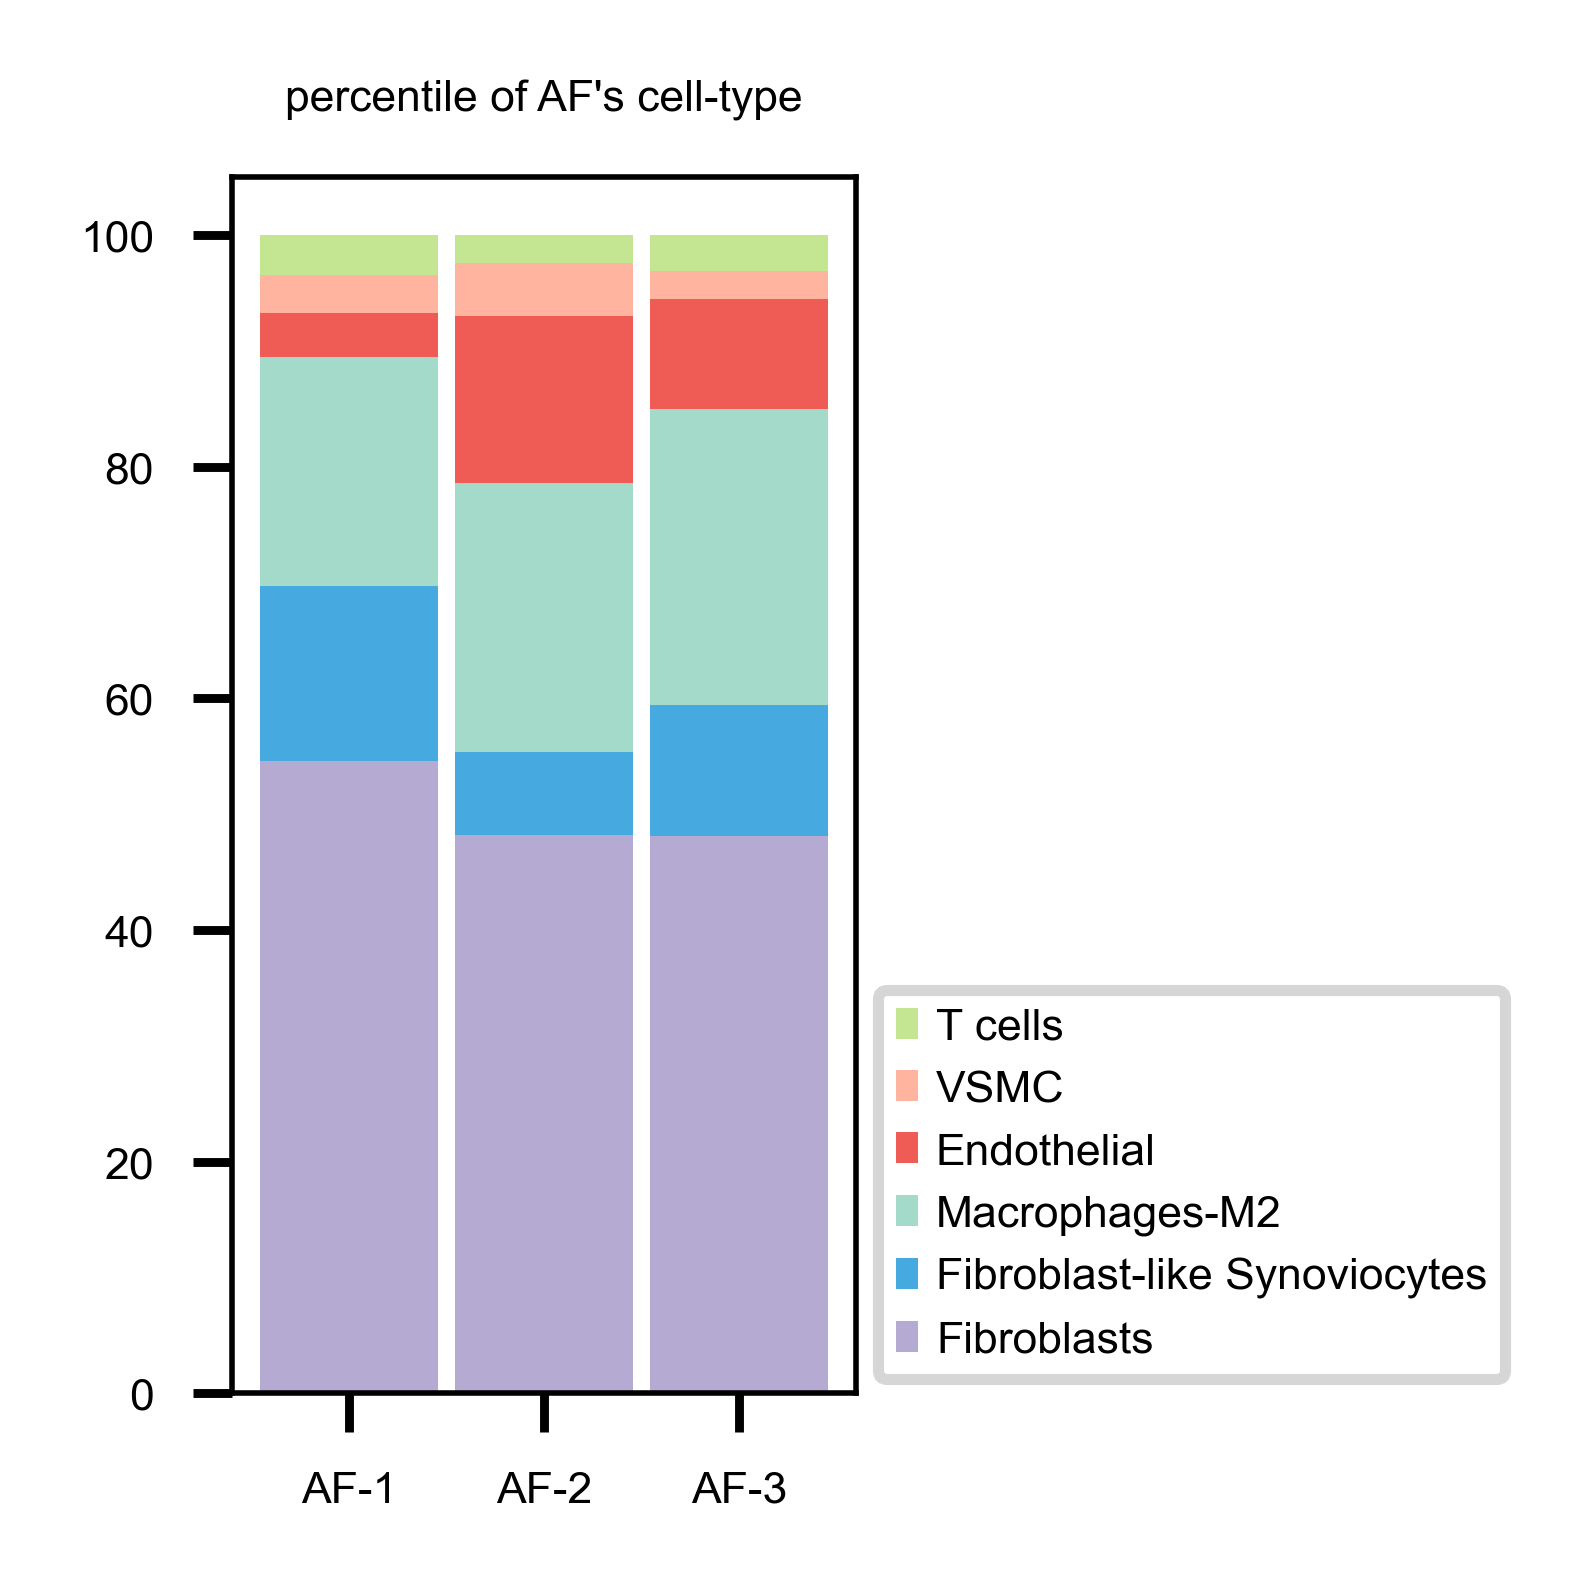

In [20]:
plt.figure(figsize=(1,2))
ax=plt.gca()
x = [1,1.22,1.44]
for i in range(df.shape[0]):
    for j in range(df.shape[1]-1,-1,-1):
        exec('c=c{}'.format(j))
        plt.bar(x[i], df.iloc[i, j], width=0.2, color=c)

plt.legend(df.columns[::-1],
           bbox_to_anchor=(1.0,.35),loc='upper left', prop={'size':4})
plt.xticks([1,1.22,1.44],['AF-1','AF-2','AF-3'], size=4)
plt.yticks(size=4)
plt.grid()
thick = 0.5
ax.spines['bottom'].set_linewidth(thick );###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(thick );####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(thick );###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(thick );###设置右边坐标轴的粗细
plt.title('percentile of AF\'s cell-type',size=4)
plt.tight_layout()
plt.savefig('./figures/cell_pertencile_AF.pdf',dpi=200, bbox_inches='tight')
plt.show()